In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating dataframe
df = pd.read_csv('Spam.csv',encoding='latin-1')

In [3]:
df.sample(5)                      # 5 random rows are generated 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1795,ham,I hope your alright babe? I worry that you mig...,NaN,NaN,NaN
4121,ham,Doc prescribed me morphine cause the other pai...,NaN,NaN,NaN
4989,spam,Phony å£350 award - Todays Voda numbers ending...,NaN,NaN,NaN
10,ham,I'm gonna be home soon and i don't want to tal...,NaN,NaN,NaN
1905,ham,"There're some people by mu, I'm at the table b...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df = df.drop(columns = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],axis = 1)           # removal of unwanted columns

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.sample(5)

,v1,v2
3543,ham,Lol ok ill try to send. Be warned Sprint is de...
926,ham,But I'm on a diet. And I ate 1 too many slices...
2682,ham,I got a call from a landline number. . . I am ...
4386,ham,S.i'm watching it in live..
2917,ham,Thanks chikku..:-) gud nyt:-*


In [8]:
# Renaming the columns
df = df.rename(columns = {'v1':'target','v2':'text'})


In [9]:
df.describe()

,target,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
# Performing label encoding
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.duplicated().sum()

403

In [13]:
df.drop_duplicates().sum()

target                                                  653
text      Go until jurong point, crazy.. Available only ...
dtype: object

In [14]:
df.shape

(5572, 2)

##EDA

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.tail()

,target,text
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


# Representing data through pie chart

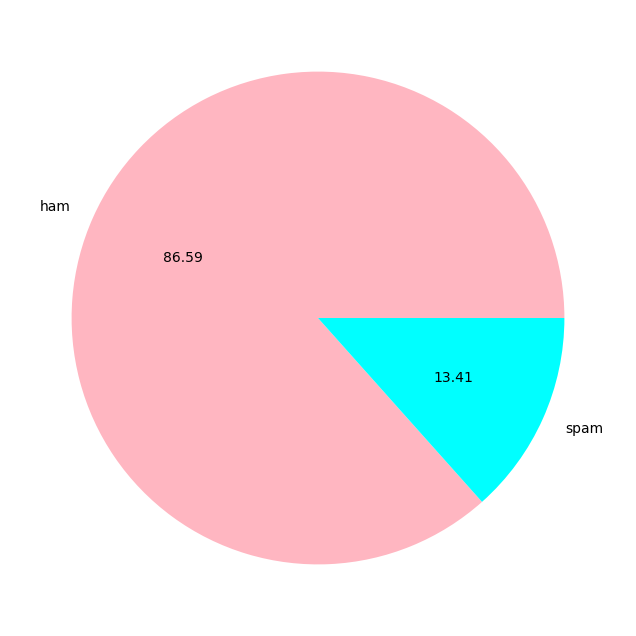

In [17]:
plt.figure(figsize= (15,8))
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],colors = ['lightpink','cyan'],autopct = "%0.2f")
plt.show()

In [18]:
# Using NLP 
import nltk

In [19]:
df['num_characters'] = df['text'].apply(len)

In [20]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
df['num_words'] = df['text'].apply(lambda X: len(nltk.word_tokenize(X)))

In [22]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sent'] =  df['text'].apply(lambda X: len(nltk.sent_tokenize(X)))

In [24]:
df.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df.describe()

,target,num_characters,num_words,num_sent
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,18.699390,1.996411
std,0.340751,59.690841,13.741932,1.520159
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.500000
75%,0.000000,121.000000,27.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [26]:
df[df['target']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['target']==1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

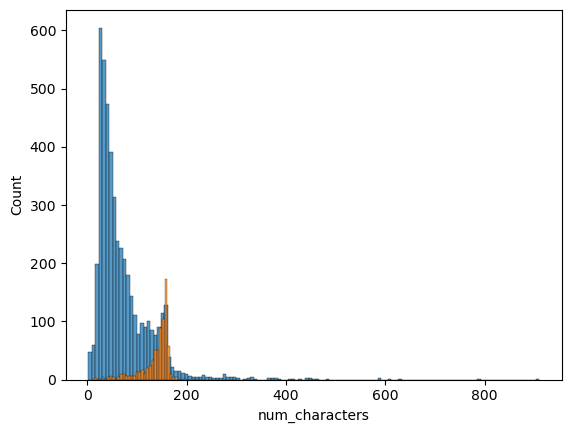

In [28]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'])

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


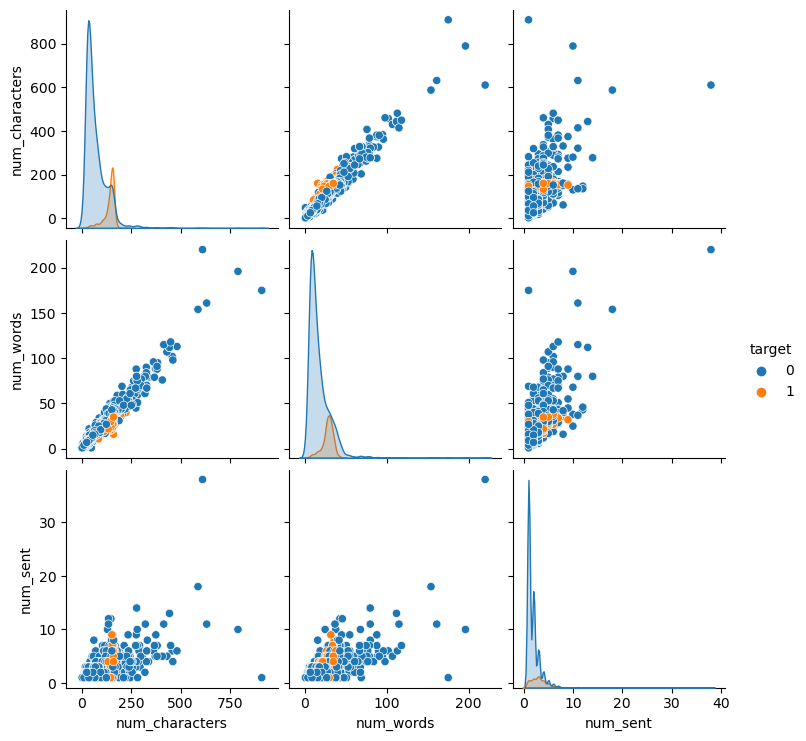

In [29]:
sns.pairplot(df,hue = 'target')

## Text Preprocessing

In [30]:
# importing required modules
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

In [31]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)        
    
    text = y[:]
    
    y.clear()
    
    for i in text: 
        y.append(ps.stem(i))
    
    return "  ".join(y)
        

In [32]:
df['transformed_text'] = df['text'].apply(transform_text)

## Converting the text into wordcloud

In [33]:

from wordcloud import WordCloud

In [34]:
wc = WordCloud(width = 500, height = 500,min_font_size = 10, background_color = 'white')


In [35]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

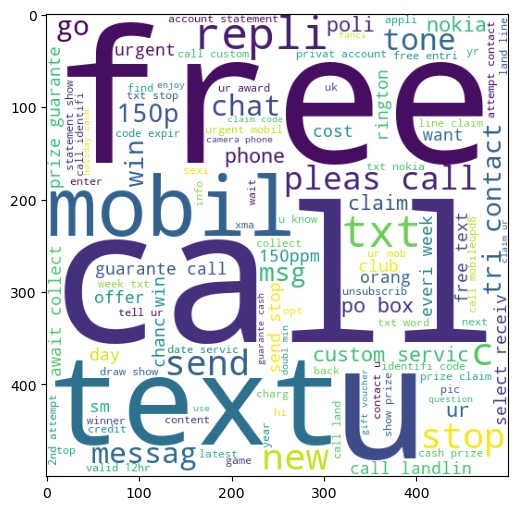

In [36]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)




In [37]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

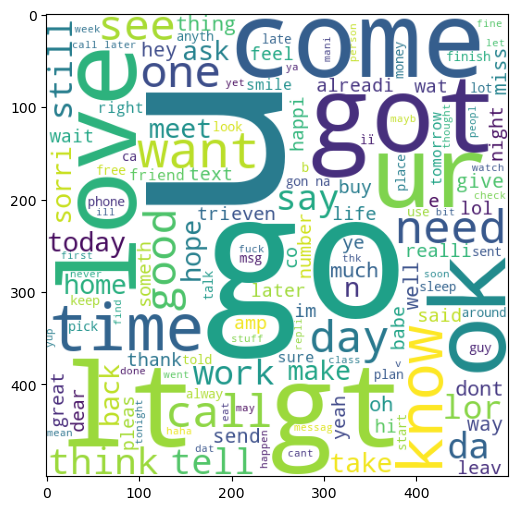

In [38]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)


In [39]:
df.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)


In [41]:
len(spam_corpus)

11490

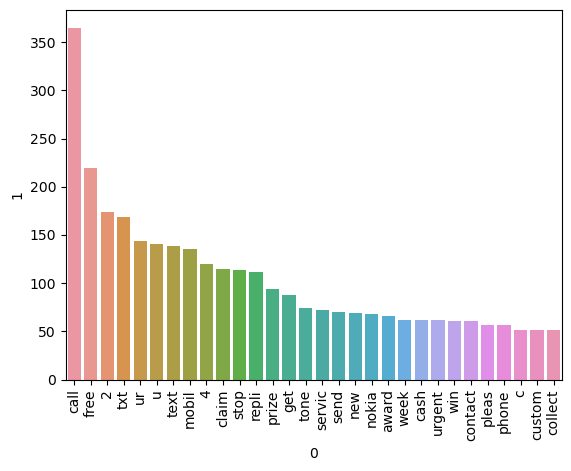

In [42]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y =pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [43]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)


In [44]:
len(ham_corpus)

38221

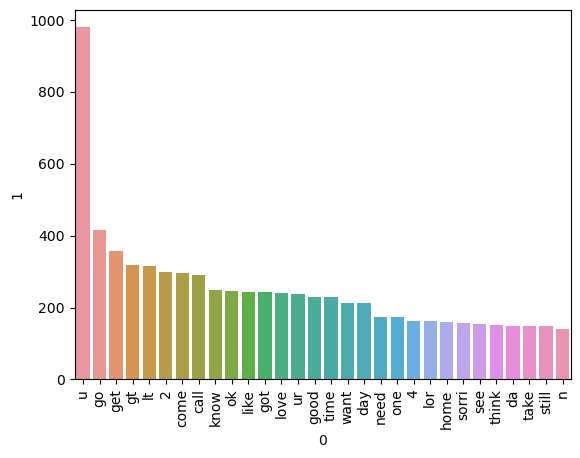

In [45]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            y =pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## Model Building

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tfidf = TfidfVectorizer()

In [48]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [49]:
X.shape

(5572, 6708)

In [50]:
y = df['target'].values

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 12)

In [52]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [54]:
mb.fit(X_train,y_train)
y_pred = mb.predict(X_test)
accuracy_score(y_pred,y_test)



0.9587443946188341

In [55]:
precision_score(y_pred,y_test)

0.6933333333333334

In [56]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_pred,y_test)



0.8690582959641255

In [57]:
precision_score(y_test,y_pred)

0.5079365079365079

In [58]:
bb.fit(X_train,y_train)
y_pred = bb.predict(X_test)
accuracy_score(y_pred,y_test)


0.9650224215246637

In [59]:
precision_score(y_test,y_pred)

0.9826086956521739

In [60]:
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
dtc = DecisionTreeClassifier()
etc = ExtraTreeClassifier()

In [61]:
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
accuracy_score(y_pred,y_test)


0.9587443946188341

In [62]:
precision_score(y_test,y_pred)

0.8714285714285714

In [63]:
etc.fit(X_train,y_train)
y_pred = etc.predict(X_test)
accuracy_score(y_pred,y_test)


0.9560538116591928

In [64]:
precision_score(y_test,y_pred)

0.9391304347826087

In [65]:
# From the above we can infer that BERNOULLI NB gives the best accuracy and precision 